# Multivariate LSTM Models


https://machinelearningmastery.com/how-to-develop-lstm-models-for-time-series-forecasting/

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
!ls "/content/gdrive/My Drive/Colab Notebooks/"

 2019-09-27-time-series-prediction-with-lstm.ipynb
 BRITS1
 BRITSnew
'Copy of GRUDtest'
'Copy of Multivariable_Linear_Regression.ipynb'
'Copy of RegressionPytorch.ipynb'
 coronavirus-cases_202005221347.csv
 coronavirus-deaths_latest.csv
 data
 GRUDinput
 GRUDtestWorks
 LSTM_Bitcoin_prediction.ipynb
 MainTestPy2.ipynb
 Multivariable_Linear_Regression.ipynb
' Multivariate Linear Regression with PyTorch.ipynb'
'Multivariate Linear Regression with PyTorch.ipynb'
 OnnxTensorflowBiLSTMwithTime.ipynb
 python3LSTMTest.ipynb
 RegressionPytorch.ipynb
 timeSeriesForecasting_multivariate.ipynb
 timeSeriesForecasting_univariate.ipynb
 torch_basic_RNN_Regression.ipynb
 univariable_linear_regression.ipynb


In [ ]:
 import io
 data = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/coronavirus-cases_202005221347.csv')

In [ ]:
print(data.keys())

Index(['Area name', 'Area code', 'Area type', 'Specimen date',
       'Daily lab-confirmed cases', 'Previously reported daily cases',
       'Change in daily cases', 'Cumulative lab-confirmed cases',
       'Previously reported cumulative cases', 'Change in cumulative cases',
       'Cumulative lab-confirmed cases rate'],
      dtype='object')


In [ ]:
death_data = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/coronavirus-deaths_latest.csv')

In [ ]:
print(death_data.keys())

Index(['Area name', 'Area code', 'Area type', 'Reporting date',
       'Daily change in deaths', 'Cumulative deaths'],
      dtype='object')


Text(0.5, 1.0, 'England COVID-19 infected cases')

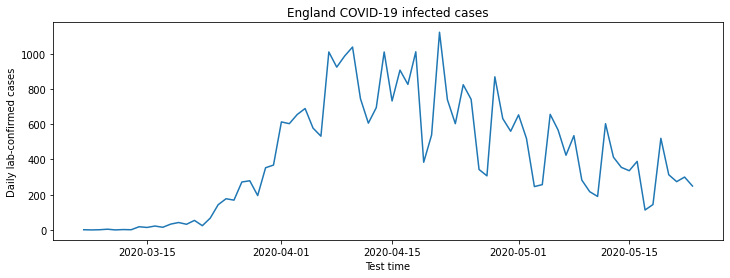

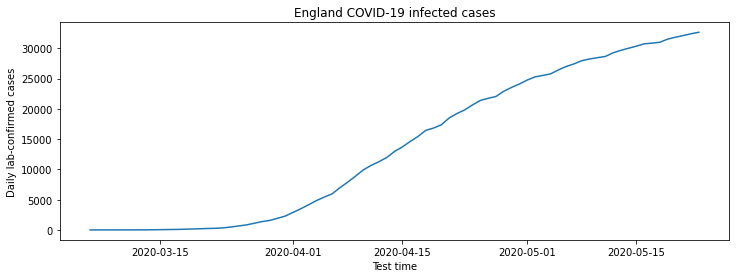

In [ ]:
# display the daily confired cases and cumulative cases
from datetime import datetime
from matplotlib import pyplot
import pylab as plt

England_time_death = []
England_death = []
England_total_death = []
for i in range(len(death_data['Area name'])):
    if death_data['Area name'][i] == 'England': 
        England_time_death.append(death_data['Reporting date'][i])
        England_death.append(death_data['Daily change in deaths'][i])
        England_total_death.append(death_data['Cumulative deaths'][i])

England_T_death = []
for t in England_time_death:
    England_T_death.append(datetime.strptime(t, '%Y-%m-%d')) 
England_T_death = np.array(England_T_death) 

# display the results
plt.figure(figsize=(12,4))
plt.plot(England_T_death, England_death)
plt.xlabel('Test time')
plt.ylabel('Daily lab-confirmed cases')
plt.title('England COVID-19 infected cases')

plt.figure(figsize=(12,4))
plt.plot(England_T_death, England_total_death)
plt.xlabel('Test time')
plt.ylabel('Daily lab-confirmed cases')
plt.title('England COVID-19 infected cases')


In [ ]:
def function_plot_lab_confirmed_region_cases(area_name):
    # only useful for different region in England
    England_time = []
    England_case = []
    England_total_case = []
    for i in range(len(data['Area name'])):
        if data['Area name'][i] == area_name:
            England_time.append(data['Specimen date'][i])
            England_case.append(data['Daily lab-confirmed cases'][i])
            England_total_case.append(data['Cumulative lab-confirmed cases'][i])

    England_T = []
    for t in England_time:
        England_T.append(datetime.strptime(t, '%Y-%m-%d')) 
    England_T = np.array(England_T) 
    
    # display the results
    plt.figure(figsize=(12,4))
    plt.plot(England_T, England_case)
    plt.xlabel('Test time')
    plt.ylabel('Daily lab-confirmed cases')
    plt.title(area_name+' COVID-19 infected cases')

    plt.figure(figsize=(12,4))
    plt.plot(England_T, England_total_case)
    plt.xlabel('Test time')
    plt.ylabel('Daily lab-confirmed cases')
    plt.title(area_name+' COVID-19 infected cases')

    return England_case[::-1], England_total_case[::-1]

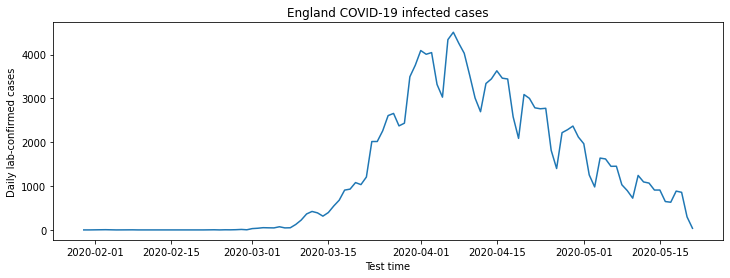

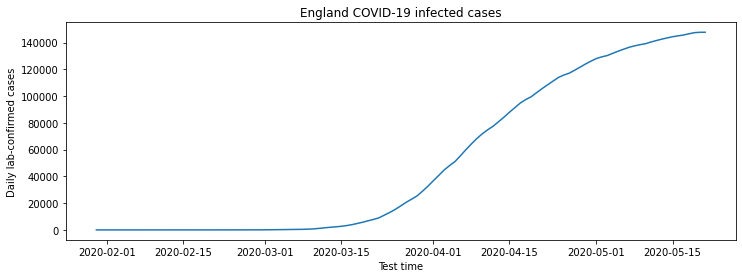

In [ ]:
data_England, England_total_case = function_plot_lab_confirmed_region_cases('England')

Text(0.5, 1.0, 'England COVID-19 infected cases')

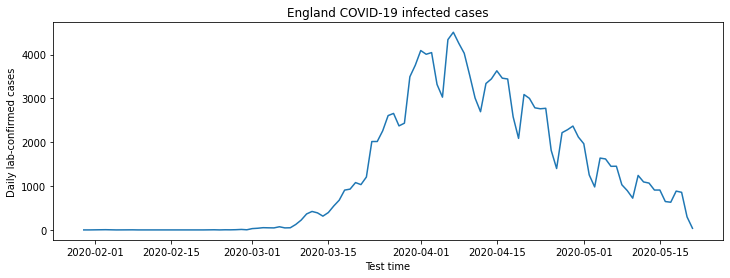

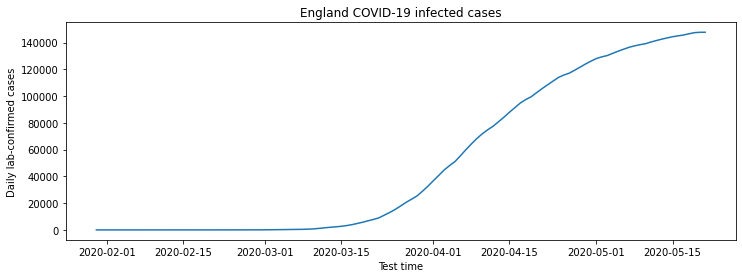

In [ ]:
England_time = []
England_case = []
England_total_case = []
for i in range(len(data['Area name'])):
    if data['Area name'][i] == 'England':
        England_time.append(data['Specimen date'][i])
        England_case.append(data['Daily lab-confirmed cases'][i])
        England_total_case.append(data['Cumulative lab-confirmed cases'][i])

England_T = []
for t in England_time:
    England_T.append(datetime.strptime(t, '%Y-%m-%d')) 
England_T = np.array(England_T) 

# display the results
plt.figure(figsize=(12,4))
plt.plot(England_T, England_case)
plt.xlabel('Test time')
plt.ylabel('Daily lab-confirmed cases')
plt.title('England COVID-19 infected cases')

plt.figure(figsize=(12,4))
plt.plot(England_T, England_total_case)
plt.xlabel('Test time')
plt.ylabel('Daily lab-confirmed cases')
plt.title('England COVID-19 infected cases')

In [ ]:
print(len(England_total_case))
print(len(England_total_death))
print(len(England_time_death))
print(len(England_time))
print(len(England_case))

print(England_time_death[2:])
print(England_time[:77])

102
79
79
102
102
['2020-05-21', '2020-05-20', '2020-05-19', '2020-05-18', '2020-05-17', '2020-05-16', '2020-05-15', '2020-05-14', '2020-05-13', '2020-05-12', '2020-05-11', '2020-05-10', '2020-05-09', '2020-05-08', '2020-05-07', '2020-05-06', '2020-05-05', '2020-05-04', '2020-05-03', '2020-05-02', '2020-05-01', '2020-04-30', '2020-04-29', '2020-04-28', '2020-04-27', '2020-04-26', '2020-04-25', '2020-04-24', '2020-04-23', '2020-04-22', '2020-04-21', '2020-04-20', '2020-04-19', '2020-04-18', '2020-04-17', '2020-04-16', '2020-04-15', '2020-04-14', '2020-04-13', '2020-04-12', '2020-04-11', '2020-04-10', '2020-04-09', '2020-04-08', '2020-04-07', '2020-04-06', '2020-04-05', '2020-04-04', '2020-04-03', '2020-04-02', '2020-04-01', '2020-03-31', '2020-03-30', '2020-03-29', '2020-03-28', '2020-03-27', '2020-03-26', '2020-03-25', '2020-03-24', '2020-03-23', '2020-03-22', '2020-03-21', '2020-03-20', '2020-03-19', '2020-03-18', '2020-03-17', '2020-03-16', '2020-03-15', '2020-03-14', '2020-03-13', '

Text(0.5, 1.0, 'England COVID-19 total death')

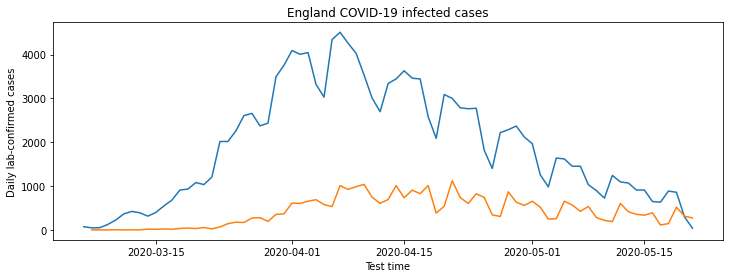

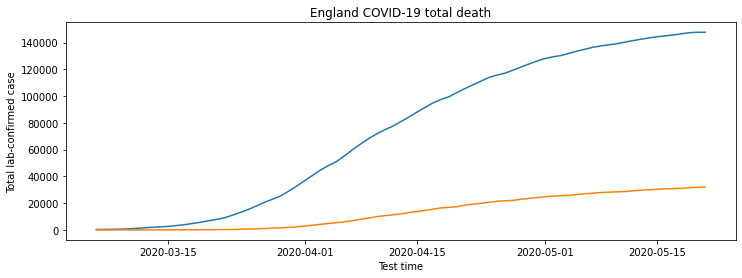

In [ ]:
# display England lab-confirmed cased and death

plt.figure(figsize=(12,4))
plt.plot(England_T[:77], England_case[:77])
plt.plot(England_T_death[2:78], England_death[2:78])
plt.xlabel('Test time')
plt.ylabel('Daily lab-confirmed cases')
plt.title('England COVID-19 infected cases')


plt.figure(figsize=(12,4))
plt.plot(England_T[:77], England_total_case[:77])
plt.plot(England_T_death[2:], England_total_death[2:])
plt.xlabel('Test time')
plt.ylabel('Total lab-confirmed case')
plt.title('England COVID-19 total death')

In [ ]:
# split a multivariate sequence into samples
def split_sequences(sequences, n_steps):
	X, y = list(), list()
	for i in range(len(sequences)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the dataset
		if end_ix > len(sequences):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1, -1]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)
 

In [ ]:
def create_time_steps(length):
  return list(range(-length, 0))

In [ ]:
def show_plot(plot_data, delta, title):
  labels = ['History', 'True Future', 'Model Prediction']
  marker = ['.-', 'rx', 'go']
  time_steps = create_time_steps(plot_data[0].shape[0])
  if delta:
    future = delta
  else:
    future = 0

  plt.title(title)
  for i, x in enumerate(plot_data):
    if i:
      plt.plot(future, plot_data[i], marker[i], markersize=10,
               label=labels[i])
    else:
      plt.plot(time_steps, plot_data[i].flatten(), marker[i], label=labels[i])
  plt.legend()
  plt.xlim([time_steps[0], (future+5)*2])
  plt.xlabel('Time-Step')
  #return plt

In [ ]:
# horizontally stack columns
in_seq1 = np.array(England_death[2:78])[::-1]
in_seq2 = np.array(England_case[:76])[::-1]
out_seq = np.array(England_death[2:78])[::-1]

in_seq1 = in_seq1.reshape((len(in_seq1), 1))
in_seq2 = in_seq2.reshape((len(in_seq2), 1))
out_seq = out_seq.reshape((len(out_seq), 1))

dataset = np.hstack((in_seq1, in_seq2, out_seq))
dataset_test = np.hstack((in_seq1, in_seq2))



# Vanilla LSTM


Predicted: [[277.16406]]
Lab_confirmed: 300.0


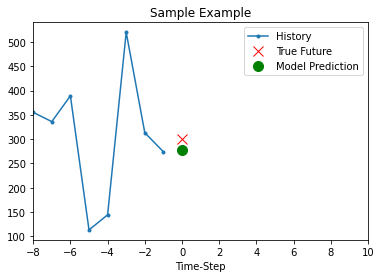

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense

# choose a number of time steps
n_steps = 8
# convert into input/output
X, y = split_sequences(dataset, n_steps)
n_features = X.shape[2]
# define model
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=200, verbose=0)

# demonstrate prediction
x_input = np.array([[355, 910], [336, 910], [389, 648], [113, 632], [144, 886], [520, 858], [313, 298], [274,  38]])
x_input = x_input.reshape((1, n_steps, n_features))

# fit model
yhat_LSTM = model.predict(x_input, verbose=0)

# demonstrate prediction
x_target = England_death[1]
print('Predicted:', yhat_LSTM)
print('Lab_confirmed:', x_target)
show_plot([in_seq1[-n_steps:], x_target, yhat_LSTM[0]], 0, 'Sample Example')



# Stacked LSTM



Predicted: [[255.51779]]
Lab_confirmed: 300.0


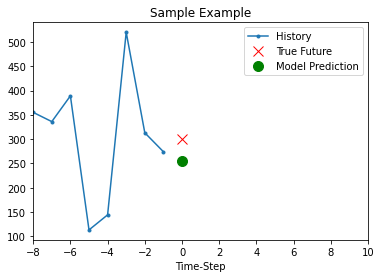

In [ ]:
# choose a number of time steps
n_steps = 8
# convert into input/output
X, y = split_sequences(dataset, n_steps)
n_features = X.shape[2]

model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=200, verbose=0)
# demonstrate prediction

x_input = np.array([[355, 910], [336, 910], [389, 648], [113, 632], [144, 886], [520, 858], [313, 298], [274,  38]])
x_input = x_input.reshape((1, n_steps, n_features))

# fit model
yhat_stack_LSTM = model.predict(x_input, verbose=0)

# demonstrate prediction
x_target = England_death[1]
print('Predicted:', yhat_stack_LSTM)
print('Lab_confirmed:', x_target)
show_plot([in_seq1[-n_steps:], x_target, yhat_stack_LSTM[0]], 0, 'Sample Example')


# Bidirectional LSTM

Predicted: [[275.7095]]
Lab_confirmed: 300.0


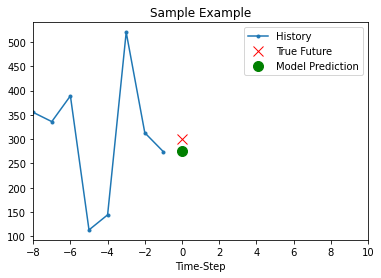

In [ ]:
from keras.layers import Bidirectional
# choose a number of time steps
n_steps = 8
# convert into input/output
X, y = split_sequences(dataset, n_steps)
n_features = X.shape[2]


model = Sequential()
model.add(Bidirectional(LSTM(50, activation='relu'), input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=200, verbose=0)

x_input = np.array([[355, 910], [336, 910], [389, 648], [113, 632], [144, 886], [520, 858], [313, 298], [274,  38]])
x_input = x_input.reshape((1, n_steps, n_features))

# fit model
yhat_BiLSTM = model.predict(x_input, verbose=0)

# demonstrate prediction
x_target = England_death[1]
print('Predicted:', yhat_BiLSTM)
print('Lab_confirmed:', x_target)
show_plot([in_seq1[-n_steps:], x_target, yhat_BiLSTM[0]], 0, 'Sample Example')

# Multivariate ConvLSTM

Predicted: [[269.08215]]
Lab_confirmed: 300.0


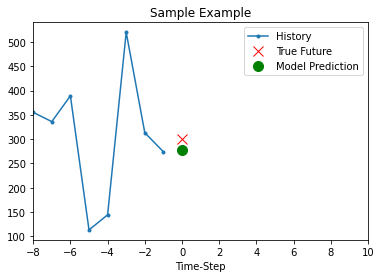

In [ ]:
# convlstm example
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import ConvLSTM2D

# choose a number of time steps
n_steps = 8
# convert into input/output
X, y = split_sequences(dataset, n_steps)
n_features = X.shape[2]
n_seq = 2
n_steps = 4
X = X.reshape((X.shape[0], n_seq, 1, n_steps, n_features))

# define model
model = Sequential()
model.add(ConvLSTM2D(filters=32, kernel_size=(1,2), activation='relu', input_shape=(n_seq, 1, n_steps, n_features)))
model.add(Flatten())
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# fit model
model.fit(X, y, epochs=500, verbose=0)

# demonstrate prediction
x_input = np.array([[355, 910], [336, 910], [389, 648], [113, 632], [144, 886], [520, 858], [313, 298], [274,  38]])
x_input = x_input.reshape((1, n_seq, 1, n_steps, n_features))


ConvLStM_yhat = model.predict(x_input, verbose=0)

# demonstrate prediction
x_target = England_death[1]
print('Predicted:', ConvLStM_yhat)
print('Lab_confirmed:', x_target)
show_plot([in_seq1[-n_steps*2:], x_target, yhat_LSTM[0]], 0, 'Sample Example')

